In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os


In [2]:
# Script definitions
# ------------------

# KMeans sequential - data.1.csv
# KMeans parallel - data.2.csv
# KMeans CUDA - data.3.csv

data_file = '../../lab4/data/data.2.csv'

images_dir = '../images/kmeans_parallel'


In [3]:
if not os.path.exists(images_dir):

	os.system("mkdir -p " + images_dir)

else :

	os.system("rm -r " + images_dir)
	os.system("mkdir -p " + images_dir)


In [4]:
data = pd.read_csv(data_file, sep=',', header=None)

columns = ['image_path', 'scheduling_type', 'chunk_size', 'clusters', 'image_size', 'iterations', 'num_threads', 'overhead', 'read', 'standardize', 'kmeans_malloc', 'kmeans_init', 'kmeans_yi2', 'kmeans_distance', 'kmeans_update', 'kmeans_free', 'kmeans_total', 'kmeans_error', 'kmeans_error_time', 'save', 'free', 'total']
headers = ['Image path', 'Scheduling type', 'Chunk size', 'Clusters', 'Image size', 'Iterations', 'Num threads', 'Overhead', 'Read', 'Standardize', 'KMeans malloc', 'KMeans init', 'KMeans yi2', 'KMeans distance', 'KMeans update', 'KMeans free', 'KMeans total', 'KMeans error', 'KMeans error time', 'Save', 'Free', 'Total']

data.columns = columns

print("Total rows: {0}".format(len(data)))


Total rows: 6400


In [5]:
data = data[data['overhead'] < 0.1]

print("Total rows: {0}".format(len(data)))


Total rows: 6400


In [6]:
# Scheduling types
scheduling_types = {
	0: 'Static',
	1: 'Dynamic',
	2: 'Guided',
	3: 'Auto'
}

data['scheduling_type_name'] = data['scheduling_type'].map(scheduling_types)

data['image'] = data['image_path'].apply(lambda x: os.path.basename(x).split('.')[0].capitalize())

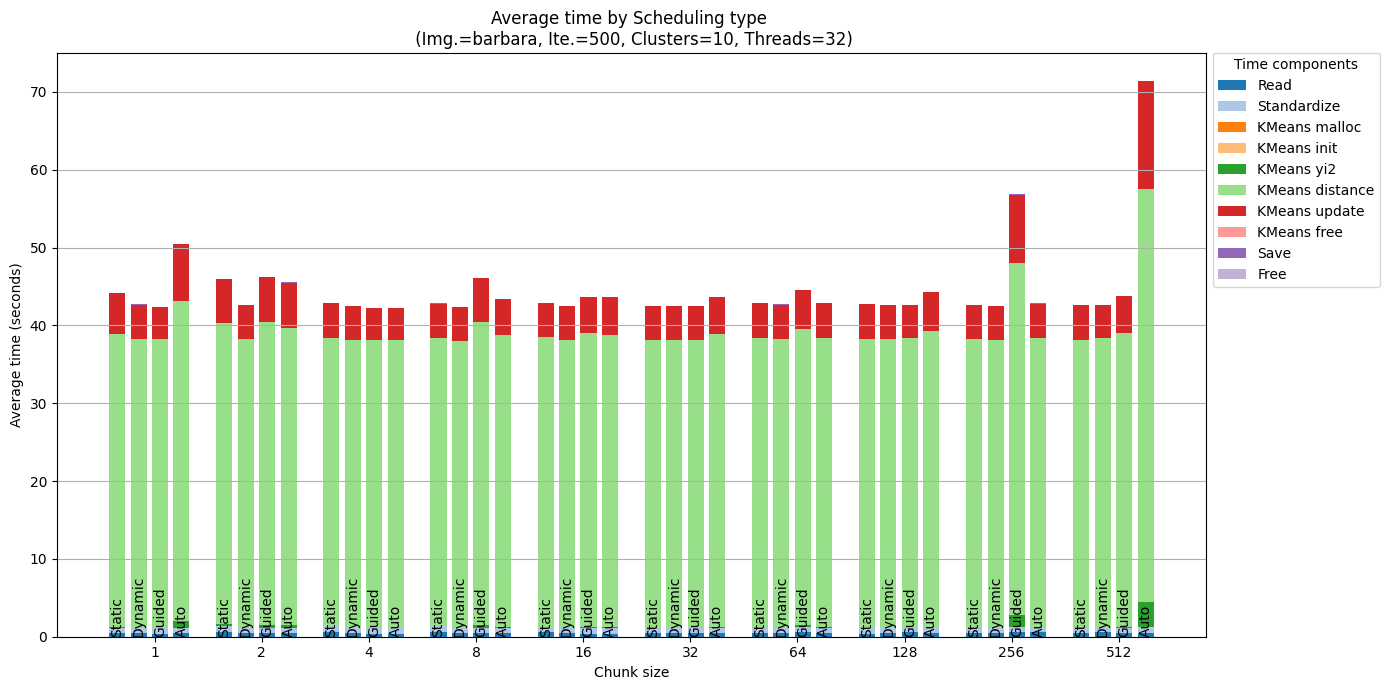

In [7]:
fixed_threads = 32
fixed_image = 'Barbara'

filtered_data = data[(data['num_threads'] == fixed_threads) & (data['image'] == fixed_image)]

grouped = filtered_data.groupby(['chunk_size', 'scheduling_type']).mean(numeric_only=True).reset_index()

chunk_sizes = sorted(grouped['chunk_size'].unique())
scheduling_values = sorted(grouped['scheduling_type'].unique())
time_components = ['read', 'standardize', 'kmeans_malloc', 'kmeans_init', 'kmeans_yi2', 'kmeans_distance', 'kmeans_update', 'kmeans_free', 'save', 'free']
labels = [headers[columns.index(comp)] for comp in time_components]

bar_width = 0.15
bar_spacing = 0.05
group_width = (bar_width + bar_spacing) * len(scheduling_values)
x = np.arange(len(chunk_sizes)) * (group_width + 0.2)

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(14, 7))

for i, sched in enumerate(scheduling_values):

	bottoms = np.zeros(len(chunk_sizes))

	for j, comp in enumerate(time_components):

		comp_values = []

		for chunk in chunk_sizes:

			row = grouped[(grouped['chunk_size'] == chunk) & (grouped['scheduling_type'] == sched)]
			val = row[comp].values[0] if not row.empty else 0
			comp_values.append(val)

		bar_positions = x + i * (bar_width + bar_spacing)

		ax.bar(bar_positions, comp_values, bottom=bottoms, width=bar_width, label=comp if i == 0 else "", color=colors[j])
		bottoms += np.array(comp_values)

	total_heights = bottoms
	bar_positions = x + i * (bar_width + bar_spacing)

	for xpos, height in zip(bar_positions, total_heights):

		ax.text(xpos, 0.015, scheduling_types[sched], ha='center', va='bottom', rotation=90)

ax.set_xticks(x + group_width / 2 - bar_spacing)
ax.set_xticklabels(chunk_sizes)
ax.set_xlabel('Chunk size')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average time by Scheduling type \n (Img.={fixed_image.lower()}, Ite.=500, Clusters=10, Threads={fixed_threads})')
ax.legend(title='Time components', labels=labels, loc='upper left', bbox_to_anchor=(1, 1.0129))
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, f'stacked_bar_chunk_scheduling_avg.{fixed_image.lower()}.png'))
plt.show()


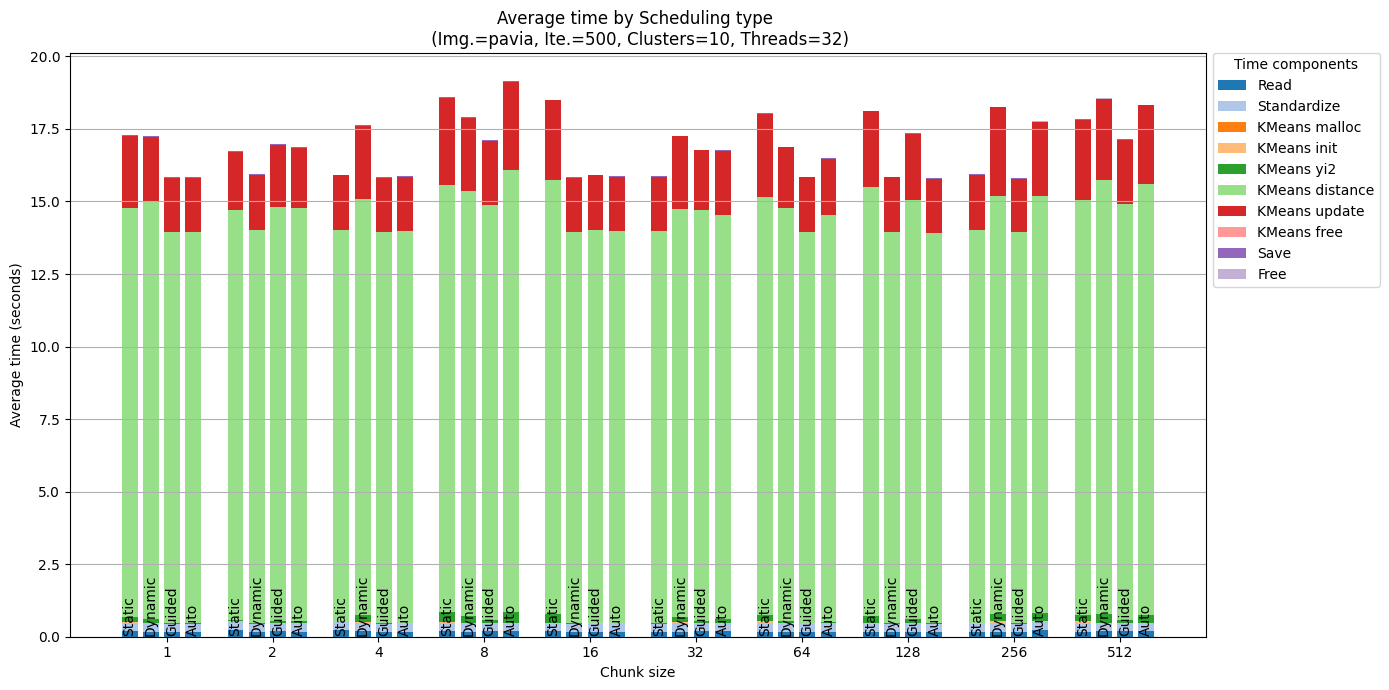

In [8]:
fixed_threads = 32
fixed_image = 'Pavia'

filtered_data = data[(data['num_threads'] == fixed_threads) & (data['image'] == fixed_image)]

grouped = filtered_data.groupby(['chunk_size', 'scheduling_type']).mean(numeric_only=True).reset_index()

chunk_sizes = sorted(grouped['chunk_size'].unique())
scheduling_values = sorted(grouped['scheduling_type'].unique())
time_components = ['read', 'standardize', 'kmeans_malloc', 'kmeans_init', 'kmeans_yi2', 'kmeans_distance', 'kmeans_update', 'kmeans_free', 'save', 'free']
labels = [headers[columns.index(comp)] for comp in time_components]

bar_width = 0.15
bar_spacing = 0.05
group_width = (bar_width + bar_spacing) * len(scheduling_values)
x = np.arange(len(chunk_sizes)) * (group_width + 0.2)

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(14, 7))

for i, sched in enumerate(scheduling_values):

	bottoms = np.zeros(len(chunk_sizes))

	for j, comp in enumerate(time_components):

		comp_values = []

		for chunk in chunk_sizes:

			row = grouped[(grouped['chunk_size'] == chunk) & (grouped['scheduling_type'] == sched)]
			val = row[comp].values[0] if not row.empty else 0
			comp_values.append(val)

		bar_positions = x + i * (bar_width + bar_spacing)

		ax.bar(bar_positions, comp_values, bottom=bottoms, width=bar_width, label=comp if i == 0 else "", color=colors[j])
		bottoms += np.array(comp_values)

	total_heights = bottoms
	bar_positions = x + i * (bar_width + bar_spacing)

	for xpos, height in zip(bar_positions, total_heights):

		ax.text(xpos, 0.015, scheduling_types[sched], ha='center', va='bottom', rotation=90)

ax.set_xticks(x + group_width / 2 - bar_spacing)
ax.set_xticklabels(chunk_sizes)
ax.set_xlabel('Chunk size')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average time by Scheduling type \n (Img.={fixed_image.lower()}, Ite.=500, Clusters=10, Threads={fixed_threads})')
ax.legend(title='Time components', labels=labels, loc='upper left', bbox_to_anchor=(1, 1.0129))
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, f'stacked_bar_chunk_scheduling_avg.{fixed_image.lower()}.png'))
plt.show()


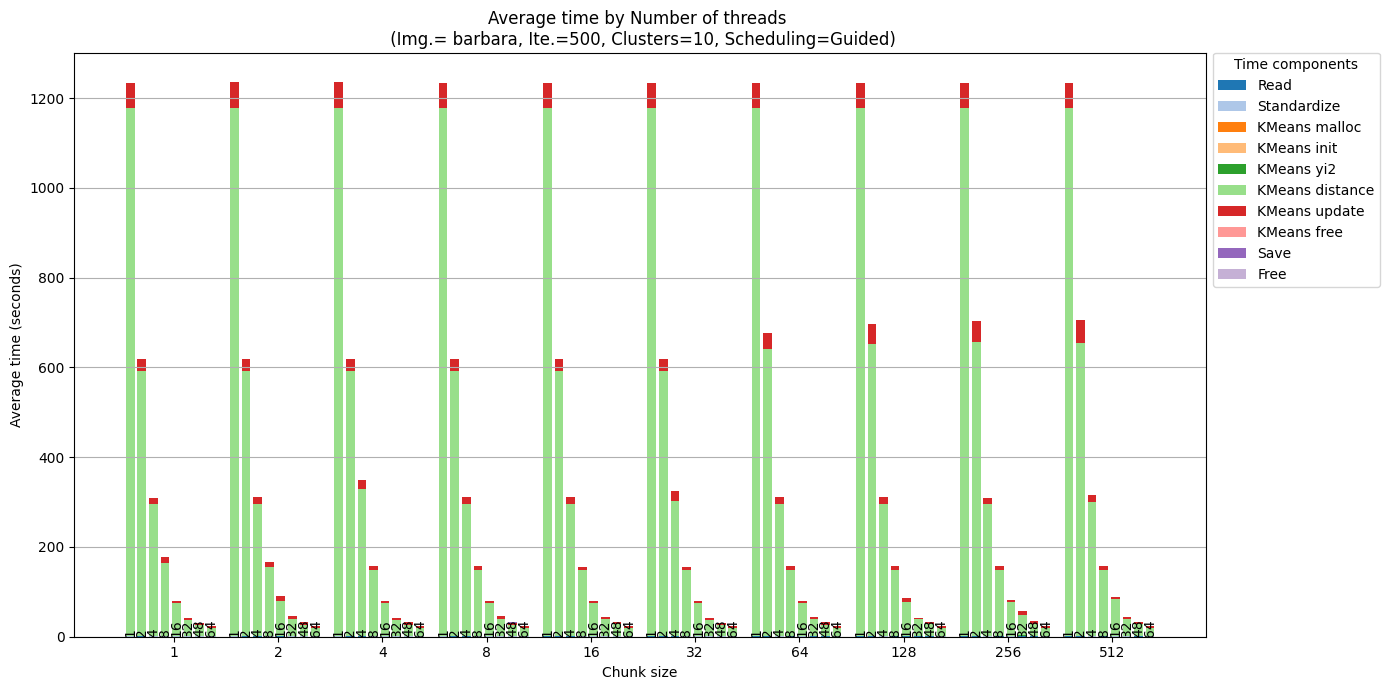

In [9]:
fixed_scheduling_type = 2
fixed_image = 'Barbara'

filtered_data = data[(data['scheduling_type'] == fixed_scheduling_type) & (data['image'] == fixed_image)]

grouped = filtered_data.groupby(['chunk_size', 'num_threads']).mean(numeric_only=True).reset_index()

chunk_sizes = sorted(grouped['chunk_size'].unique())
thread_values = sorted(grouped['num_threads'].unique())
time_components = ['read', 'standardize', 'kmeans_malloc', 'kmeans_init', 'kmeans_yi2', 'kmeans_distance', 'kmeans_update', 'kmeans_free', 'save', 'free']
labels = [headers[columns.index(comp)] for comp in time_components]

bar_width = 0.15
bar_spacing = 0.05
group_width = (bar_width + bar_spacing) * len(thread_values)
x = np.arange(len(chunk_sizes)) * (group_width + 0.2)

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(14, 7))

for i, thread_value in enumerate(thread_values):

	bottoms = np.zeros(len(chunk_sizes))

	for j, comp in enumerate(time_components):

		comp_values = []

		for chunk in chunk_sizes:

			row = grouped[(grouped['chunk_size'] == chunk) & (grouped['num_threads'] == thread_value)]
			val = row[comp].values[0] if not row.empty else 0
			comp_values.append(val)

		bar_positions = x + i * (bar_width + bar_spacing)

		bars = ax.bar(bar_positions, comp_values, bottom=bottoms, width=bar_width, label=comp if i == 0 else "", color=colors[j])
		bottoms += np.array(comp_values)

	total_heights = bottoms
	bar_positions = x + i * (bar_width + bar_spacing)

	for xpos, height in zip(bar_positions, total_heights):

		ax.text(xpos, 0.015, thread_value, ha='center', va='bottom', rotation=90)

ax.set_ylim(0, 1300)
ax.set_xticks(x + group_width / 2 - bar_spacing)
ax.set_xticklabels(chunk_sizes)
ax.set_xlabel('Chunk size')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average time by Number of threads \n (Img.= {fixed_image.lower()}, Ite.=500, Clusters=10, Scheduling={scheduling_types[fixed_scheduling_type]})')
ax.legend(title='Time components', labels=labels, loc='upper left', bbox_to_anchor=(1, 1.0129))
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, f'stacked_bar_chunk_threads_avg.{fixed_image.lower()}.png'))
plt.show()


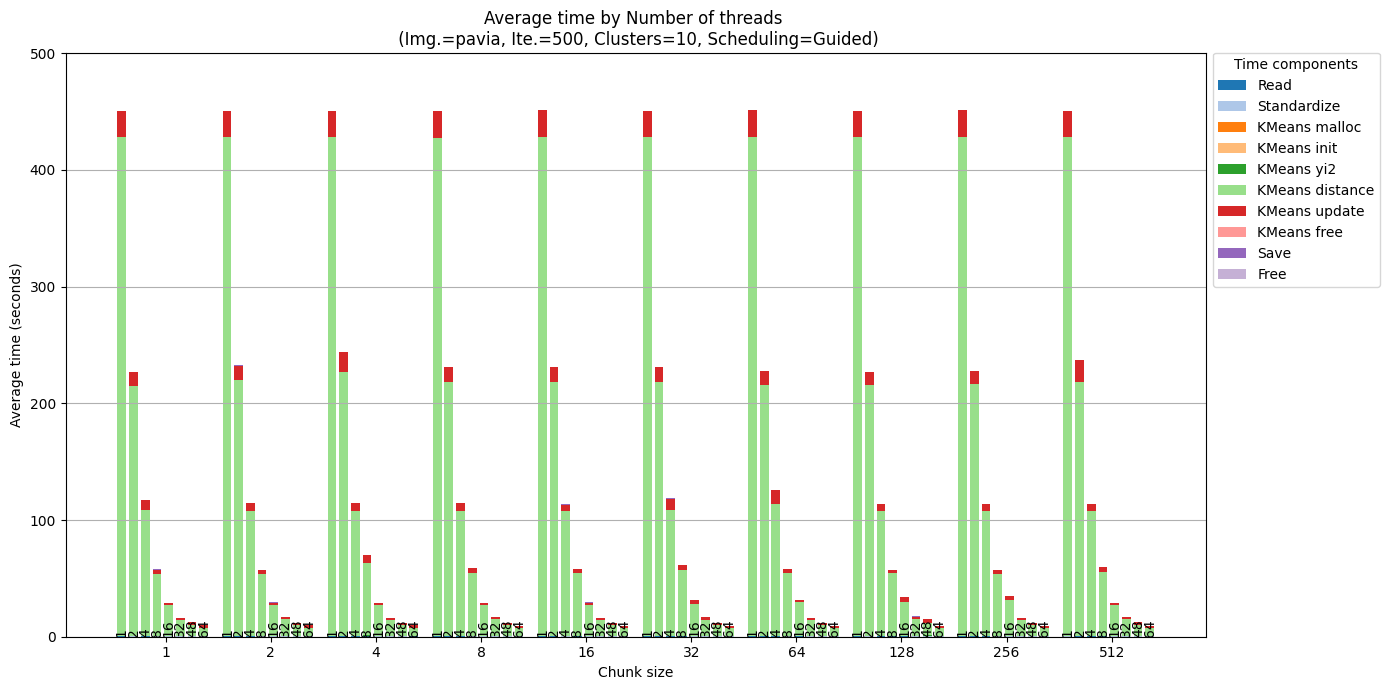

In [10]:
fixed_scheduling_type = 2
fixed_image = 'Pavia'

filtered_data = data[(data['scheduling_type'] == fixed_scheduling_type) & (data['image'] == fixed_image)]

grouped = filtered_data.groupby(['chunk_size', 'num_threads']).mean(numeric_only=True).reset_index()

chunk_sizes = sorted(grouped['chunk_size'].unique())
thread_values = sorted(grouped['num_threads'].unique())
time_components = ['read', 'standardize', 'kmeans_malloc', 'kmeans_init', 'kmeans_yi2', 'kmeans_distance', 'kmeans_update', 'kmeans_free', 'save', 'free']
labels = [headers[columns.index(comp)] for comp in time_components]

bar_width = 0.15
bar_spacing = 0.05
group_width = (bar_width + bar_spacing) * len(thread_values)
x = np.arange(len(chunk_sizes)) * (group_width + 0.2)

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(14, 7))

for i, thread_value in enumerate(thread_values):

	bottoms = np.zeros(len(chunk_sizes))

	for j, comp in enumerate(time_components):

		comp_values = []

		for chunk in chunk_sizes:

			row = grouped[(grouped['chunk_size'] == chunk) & (grouped['num_threads'] == thread_value)]
			val = row[comp].values[0] if not row.empty else 0
			comp_values.append(val)

		bar_positions = x + i * (bar_width + bar_spacing)

		bars = ax.bar(bar_positions, comp_values, bottom=bottoms, width=bar_width, label=comp if i == 0 else "", color=colors[j])
		bottoms += np.array(comp_values)

	total_heights = bottoms
	bar_positions = x + i * (bar_width + bar_spacing)

	for xpos, height in zip(bar_positions, total_heights):

		ax.text(xpos, 0.015, thread_value, ha='center', va='bottom', rotation=90)

ax.set_ylim(0, 500)
ax.set_xticks(x + group_width / 2 - bar_spacing)
ax.set_xticklabels(chunk_sizes)
ax.set_xlabel('Chunk size')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average time by Number of threads \n (Img.={fixed_image.lower()}, Ite.=500, Clusters=10, Scheduling={scheduling_types[fixed_scheduling_type]})')
ax.legend(title='Time components', labels=labels, loc='upper left', bbox_to_anchor=(1, 1.0129))
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, f'stacked_bar_chunk_threads_avg.{fixed_image.lower()}.png'))
plt.show()


In [11]:
min_threads = data['num_threads'].min()
ref_dataset = data[data['num_threads'] == min_threads]

ref_times_yi2 = ref_dataset.groupby(['image', 'scheduling_type', 'chunk_size'])['kmeans_yi2'].mean()
ref_times_distance = ref_dataset.groupby(['image', 'scheduling_type', 'chunk_size'])['kmeans_distance'].mean()
ref_times_update = ref_dataset.groupby(['image', 'scheduling_type', 'chunk_size'])['kmeans_update'].mean()

summary_data = []

for (threads_value, image, sched_type, chunk_size), group in data.groupby(['num_threads', 'image', 'scheduling_type', 'chunk_size']):

	# Sequential part
	mean_malloc_time = group['kmeans_malloc'].mean()
	mean_init_time = group['kmeans_init'].mean()
	mean_free_time = group['kmeans_free'].mean()

	# Parallel part
	mean_yi2_time = group['kmeans_yi2'].mean()
	mean_distance_time = group['kmeans_distance'].mean()
	mean_update_time = group['kmeans_update'].mean()

	mean_total_time = mean_malloc_time + mean_init_time + mean_free_time + mean_yi2_time + mean_distance_time + mean_update_time

	ref_time_yi2 = ref_times_yi2.get((image, sched_type, chunk_size), None)
	speedup_yi2 = ref_time_yi2 / mean_yi2_time
	efficiency_yi2 = speedup_yi2 / threads_value

	ref_time_distance = ref_times_distance.get((image, sched_type, chunk_size), None)
	speedup_distance = ref_time_distance / mean_distance_time
	efficiency_distance = speedup_distance / threads_value

	ref_time_update = ref_times_update.get((image, sched_type, chunk_size), None)
	speedup_update = ref_time_update / mean_update_time
	efficiency_update = speedup_update / threads_value

	summary_data.append([
		threads_value,
		image,
		sched_type,
		scheduling_types[sched_type],
		chunk_size,
		mean_malloc_time,
		mean_init_time,
		mean_free_time,
		mean_yi2_time,
		mean_distance_time,
		mean_update_time,
		mean_total_time,
		ref_time_yi2,
		ref_time_distance,
		ref_time_update,
		speedup_yi2,
		speedup_distance,
		speedup_update,
		efficiency_yi2,
		efficiency_distance,
		efficiency_update,
	])

summary_df = pd.DataFrame(summary_data, columns=[
	'Number of threads',
	'Image',
	'Scheduling type',
	'Scheduling type name',
	'Chunk size',
	'Mean malloc time',
	'Mean init time',
	'Mean free time',
	'Mean yi2 time',
	'Mean distance time',
	'Mean update time',
	'Mean total time',
	'Ref yi2 time',
	'Ref distance time',
	'Ref update time',
	'Speedup yi2',
	'Speedup distance',
	'Speedup update',
	'Efficiency yi2',
	'Efficiency distance',
	'Efficiency update',
])

summary_df = summary_df.round(5)

display(summary_df)

# Save summary DataFrame to LaTeX
# summary_df.to_latex(os.path.join(images_dir, 'summary_df.tex'), index=False, float_format="%.5f")


,Number of threads,Image,Scheduling type,Scheduling type name,Chunk size,Mean malloc time,Mean init time,Mean free time,Mean yi2 time,Mean distance time,...,Mean total time,Ref yi2 time,Ref distance time,Ref update time,Speedup yi2,Speedup distance,Speedup update,Efficiency yi2,Efficiency distance,Efficiency update
0,1,Barbara,0,Static,1,0.00001,0.00002,0.0,0.00165,1177.93070,...,1235.05533,0.00165,1177.93070,57.12294,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
1,1,Barbara,0,Static,2,0.00002,0.00002,0.0,0.00164,1177.78897,...,1234.37815,0.00164,1177.78897,56.58749,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
2,1,Barbara,0,Static,4,0.00002,0.00002,0.0,0.00164,1177.78320,...,1234.49806,0.00164,1177.78320,56.71317,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
3,1,Barbara,0,Static,8,0.00001,0.00002,0.0,0.00164,1178.00208,...,1234.65236,0.00164,1178.00208,56.64860,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
4,1,Barbara,0,Static,16,0.00002,0.00002,0.0,0.00165,1177.70131,...,1234.43763,0.00165,1177.70131,56.73463,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,64,Pavia,3,Auto,32,0.00001,0.00227,0.0,0.07970,6.90663,...,8.94262,0.00075,429.75615,23.99895,0.00938,62.22370,12.28196,0.00015,0.97225,0.19191
636,64,Pavia,3,Auto,64,0.00001,0.00132,0.0,0.01767,6.76366,...,8.47158,0.00075,429.81876,24.05896,0.04226,63.54821,14.24523,0.00066,0.99294,0.22258
637,64,Pavia,3,Auto,128,0.00001,0.00228,0.0,0.02860,6.78019,...,8.55431,0.00074,429.85683,24.06711,0.02589,63.39890,13.80616,0.00040,0.99061,0.21572
638,64,Pavia,3,Auto,256,0.00001,0.00135,0.0,0.04378,6.80945,...,8.62575,0.00073,428.72310,22.83999,0.01660,62.96000,12.89554,0.00026,0.98375,0.20149


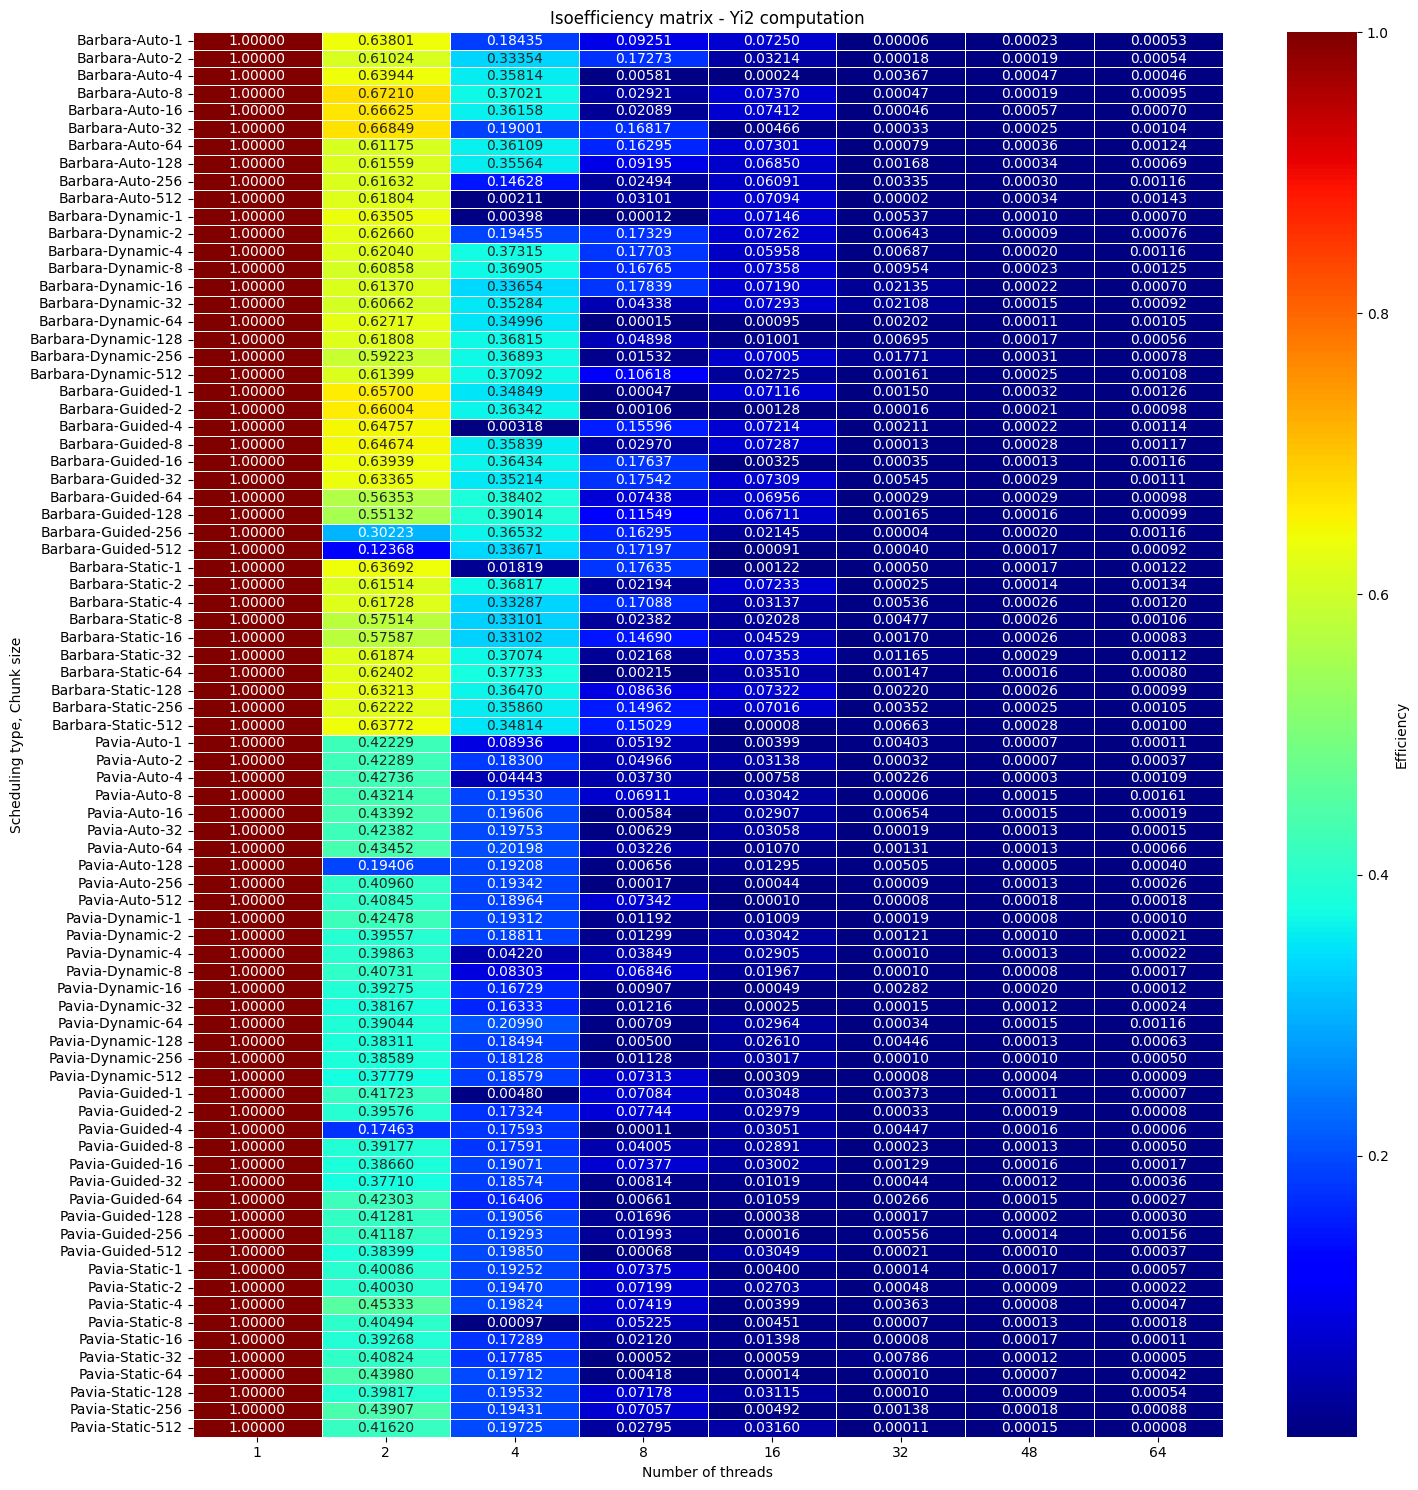

In [12]:
auto_pivot = pd.pivot_table(
	summary_df,
	values='Efficiency yi2',
	index=['Image', 'Scheduling type name', 'Chunk size'],
	columns='Number of threads'
)

plt.figure(figsize=(15, 15))

sns.heatmap(auto_pivot, annot=True, fmt=".5f", cmap='jet', cbar_kws={'label': 'Efficiency'}, linewidths=0.5, linecolor='white')

plt.title('Isoefficiency matrix - Yi2 computation')
plt.ylabel('Scheduling type, Chunk size')
plt.xlabel('Number of threads')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'isoefficiency_yi2.png'))

plt.show()


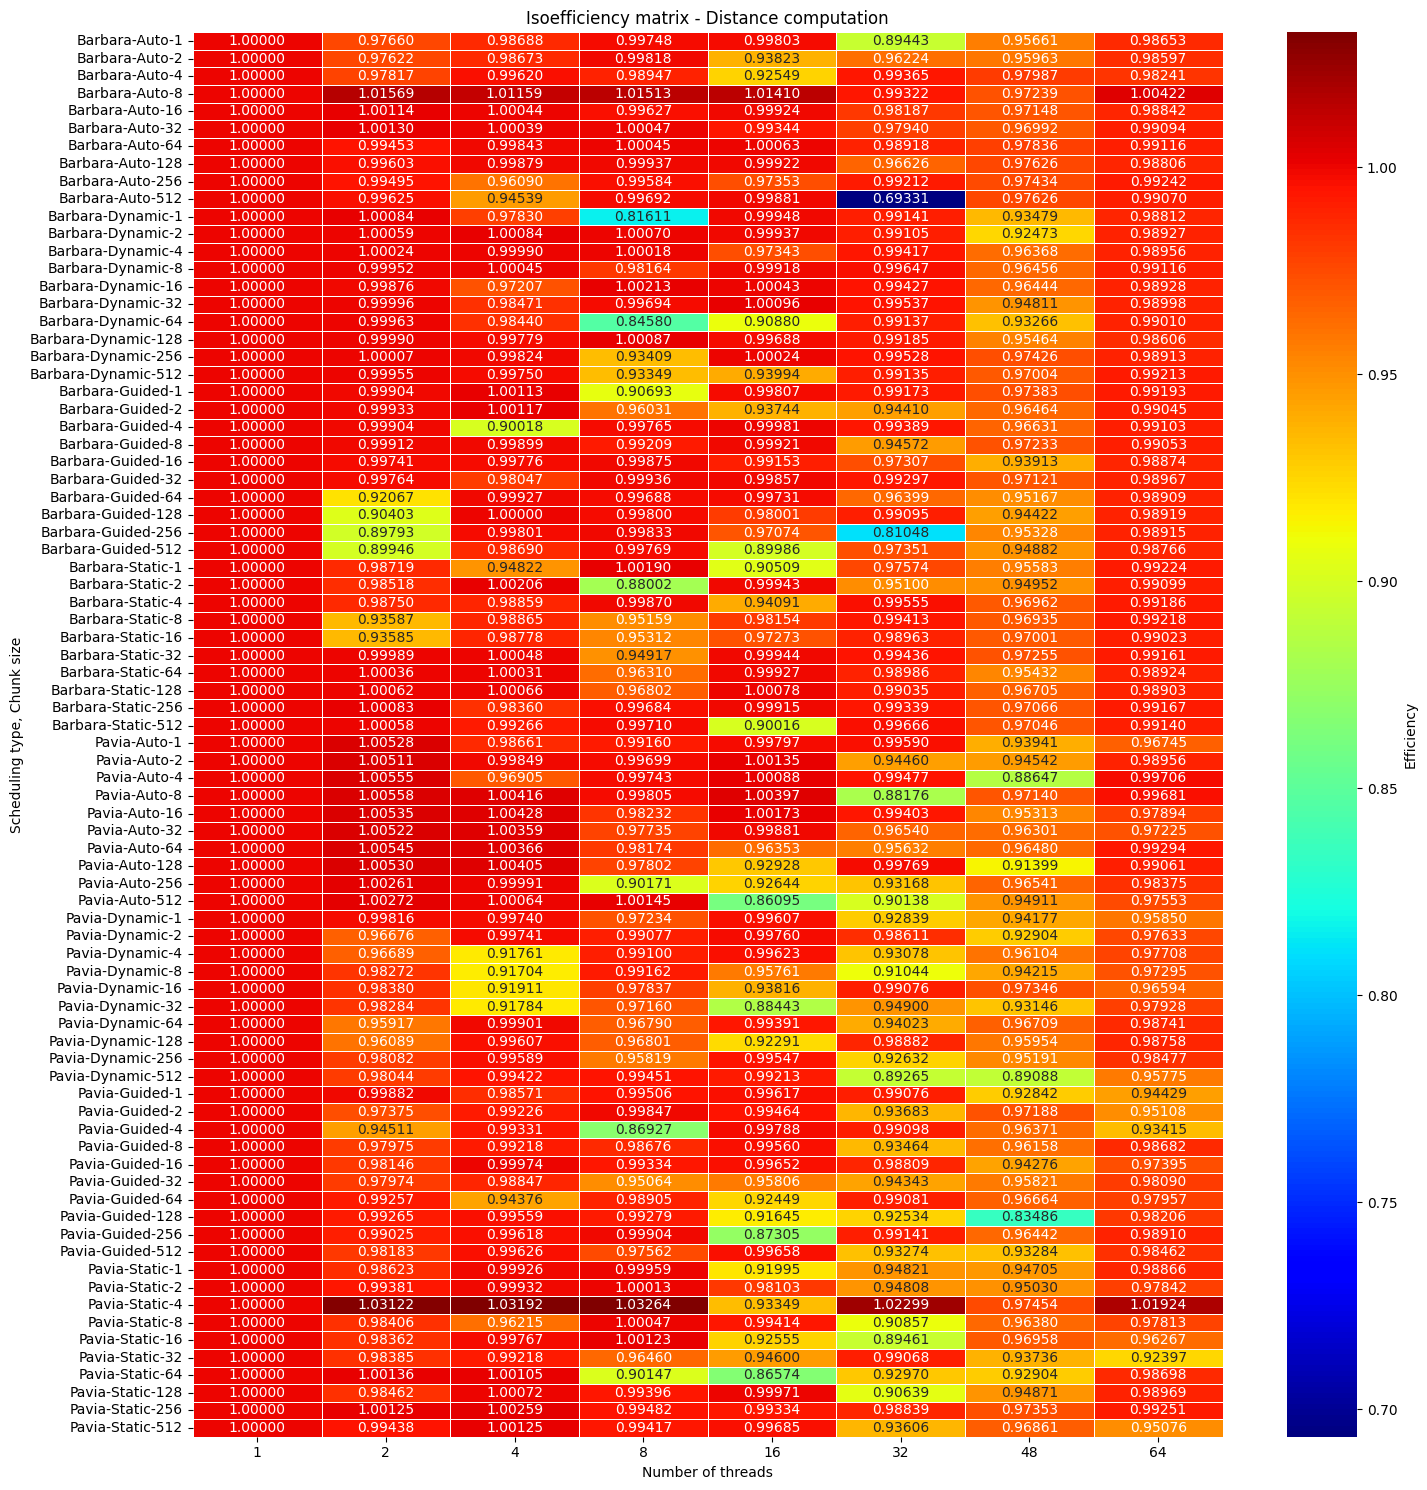

In [13]:
manual_pivot = pd.pivot_table(
	summary_df,
	values='Efficiency distance',
	index=['Image', 'Scheduling type name', 'Chunk size'],
	columns='Number of threads'
)

plt.figure(figsize=(15, 15))

sns.heatmap(manual_pivot, annot=True, fmt=".5f", cmap='jet', cbar_kws={'label': 'Efficiency'}, linewidths=0.5, linecolor='white')

plt.title('Isoefficiency matrix - Distance computation')
plt.ylabel('Scheduling type, Chunk size')
plt.xlabel('Number of threads')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'isoefficiency_distance.png'))

plt.show()


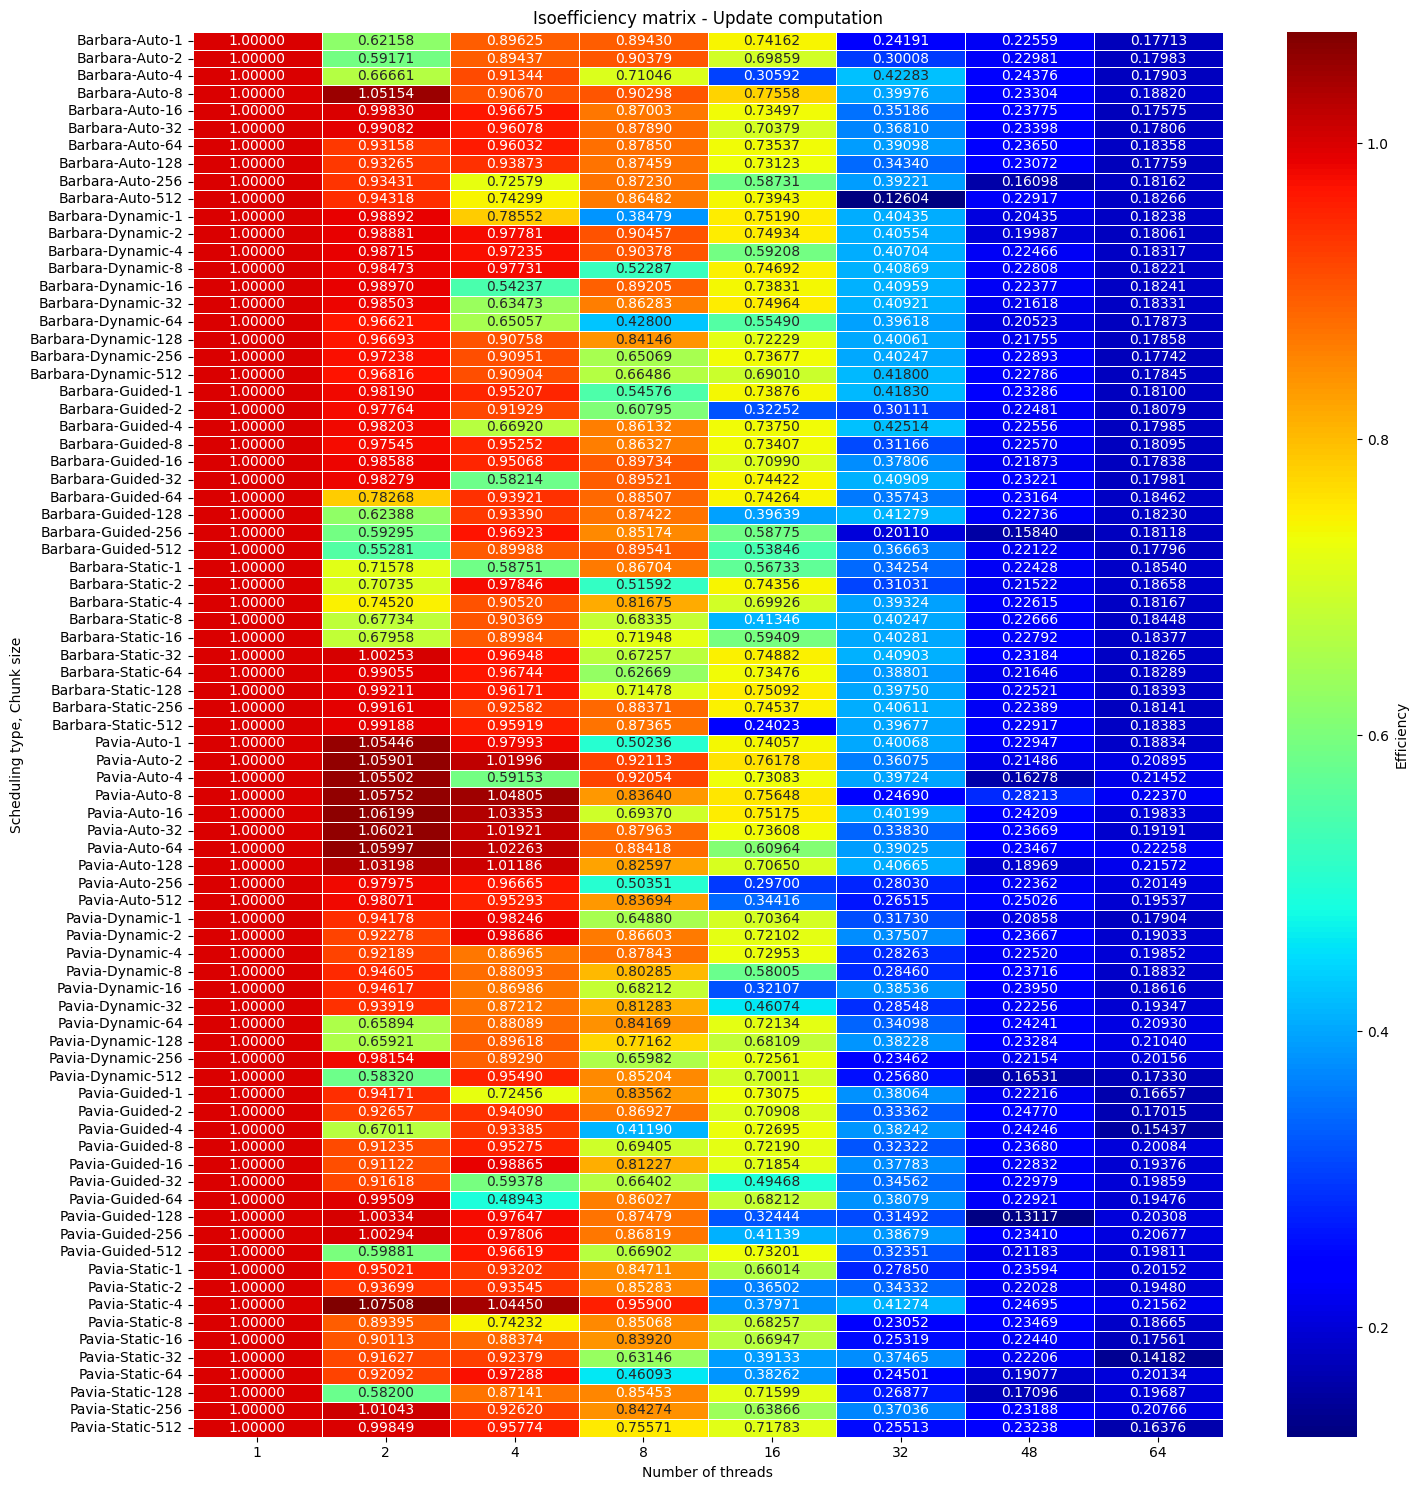

In [14]:
manual_pivot = pd.pivot_table(
	summary_df,
	values='Efficiency update',
	index=['Image', 'Scheduling type name', 'Chunk size'],
	columns='Number of threads'
)

plt.figure(figsize=(15, 15))

sns.heatmap(manual_pivot, annot=True, fmt=".5f", cmap='jet', cbar_kws={'label': 'Efficiency'}, linewidths=0.5, linecolor='white')

plt.title('Isoefficiency matrix - Update computation')
plt.ylabel('Scheduling type, Chunk size')
plt.xlabel('Number of threads')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'isoefficiency_update.png'))

plt.show()


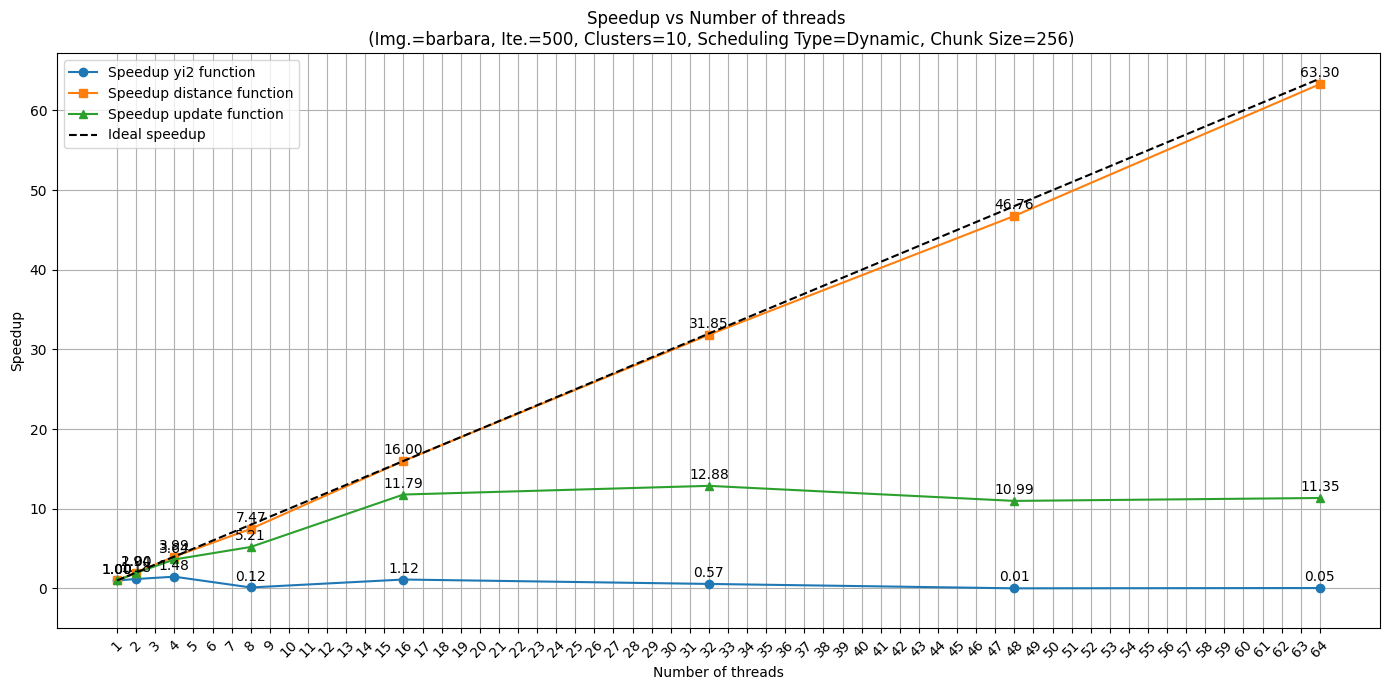

In [15]:
fixed_image = 'Barbara'
fixed_scheduling_type = 1
fixed_chunk_size = 256

filtered_df = summary_df[(summary_df['Scheduling type'] == fixed_scheduling_type) & (summary_df['Chunk size'] == fixed_chunk_size) & (summary_df['Image'] == fixed_image)]

filtered_df = filtered_df.sort_values('Number of threads')
max_threads = filtered_df['Number of threads'].max()

plt.figure(figsize=(14, 7))

plt.plot(filtered_df['Number of threads'], filtered_df['Speedup yi2'], marker='o', label='Speedup yi2 function')
plt.plot(filtered_df['Number of threads'], filtered_df['Speedup distance'], marker='s', label='Speedup distance function')
plt.plot(filtered_df['Number of threads'], filtered_df['Speedup update'], marker='^', label='Speedup update function')
plt.plot([1, max_threads], [1, max_threads], 'k--', label='Ideal speedup')

plt.title(f'Speedup vs Number of threads \n (Img.={fixed_image.lower()}, Ite.=500, Clusters=10, Scheduling Type={scheduling_types[fixed_scheduling_type]}, Chunk Size={fixed_chunk_size})')
plt.xlabel('Number of threads')
plt.ylabel('Speedup')

plt.xticks(range(1, max_threads + 1), rotation=45)
plt.yticks()
plt.ylim(bottom=-5)

plt.grid()

plt.legend()

for i, row in filtered_df.iterrows():

	plt.annotate(f"{row['Speedup yi2']:.2f}", (row['Number of threads'], row['Speedup yi2']), ha='center', xytext=(0, 5), textcoords='offset points')
	plt.annotate(f"{row['Speedup distance']:.2f}", (row['Number of threads'], row['Speedup distance']), ha='center', xytext=(0, 5), textcoords='offset points')
	plt.annotate(f"{row['Speedup update']:.2f}", (row['Number of threads'], row['Speedup update']), ha='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, f'speedup_vs_threads.{fixed_image.lower()}.png'))

plt.show()


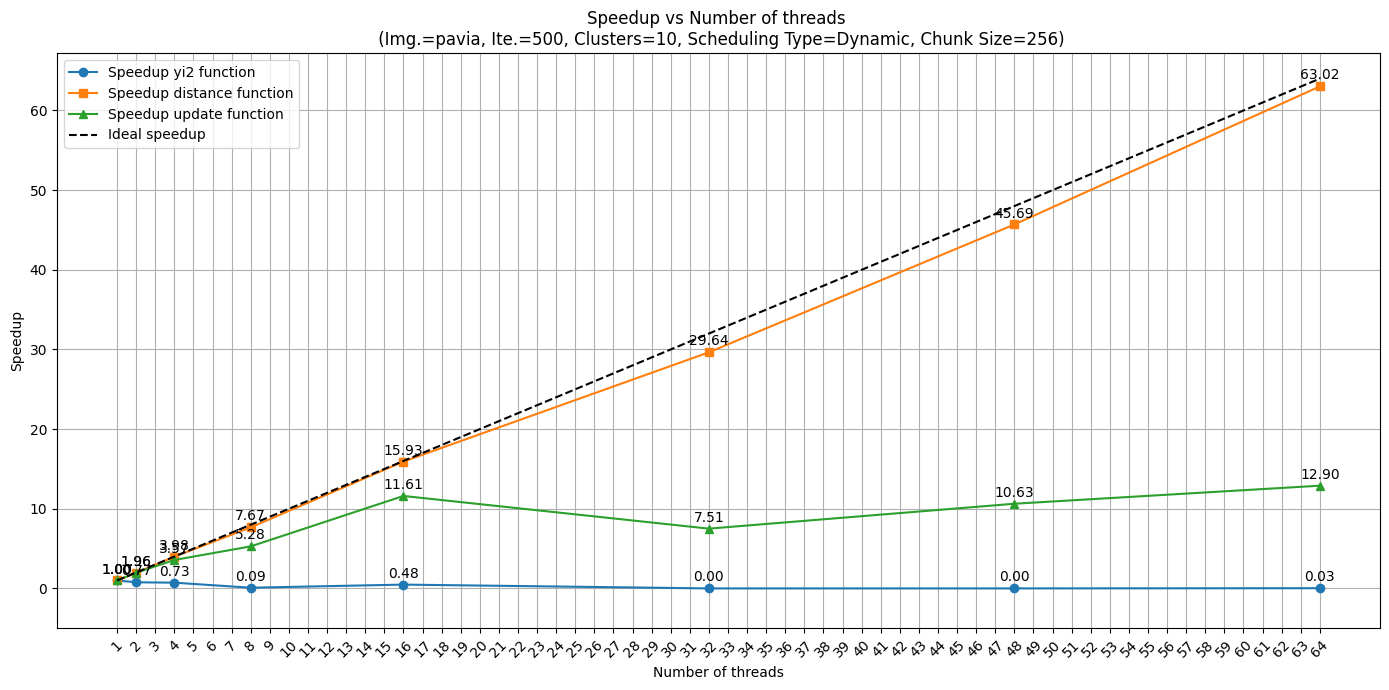

In [16]:
fixed_image = 'Pavia'
fixed_scheduling_type = 1
fixed_chunk_size = 256

filtered_df = summary_df[(summary_df['Scheduling type'] == fixed_scheduling_type) & (summary_df['Chunk size'] == fixed_chunk_size) & (summary_df['Image'] == fixed_image)]

filtered_df = filtered_df.sort_values('Number of threads')
max_threads = filtered_df['Number of threads'].max()

plt.figure(figsize=(14, 7))

plt.plot(filtered_df['Number of threads'], filtered_df['Speedup yi2'], marker='o', label='Speedup yi2 function')
plt.plot(filtered_df['Number of threads'], filtered_df['Speedup distance'], marker='s', label='Speedup distance function')
plt.plot(filtered_df['Number of threads'], filtered_df['Speedup update'], marker='^', label='Speedup update function')
plt.plot([1, max_threads], [1, max_threads], 'k--', label='Ideal speedup')

plt.title(f'Speedup vs Number of threads \n (Img.={fixed_image.lower()}, Ite.=500, Clusters=10, Scheduling Type={scheduling_types[fixed_scheduling_type]}, Chunk Size={fixed_chunk_size})')
plt.xlabel('Number of threads')
plt.ylabel('Speedup')

plt.xticks(range(1, max_threads + 1), rotation=45)
plt.yticks()
plt.ylim(bottom=-5)

plt.grid()

plt.legend()

for i, row in filtered_df.iterrows():

	plt.annotate(f"{row['Speedup yi2']:.2f}", (row['Number of threads'], row['Speedup yi2']), ha='center', xytext=(0, 5), textcoords='offset points')
	plt.annotate(f"{row['Speedup distance']:.2f}", (row['Number of threads'], row['Speedup distance']), ha='center', xytext=(0, 5), textcoords='offset points')
	plt.annotate(f"{row['Speedup update']:.2f}", (row['Number of threads'], row['Speedup update']), ha='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, f'speedup_vs_threads.{fixed_image.lower()}.png'))

plt.show()


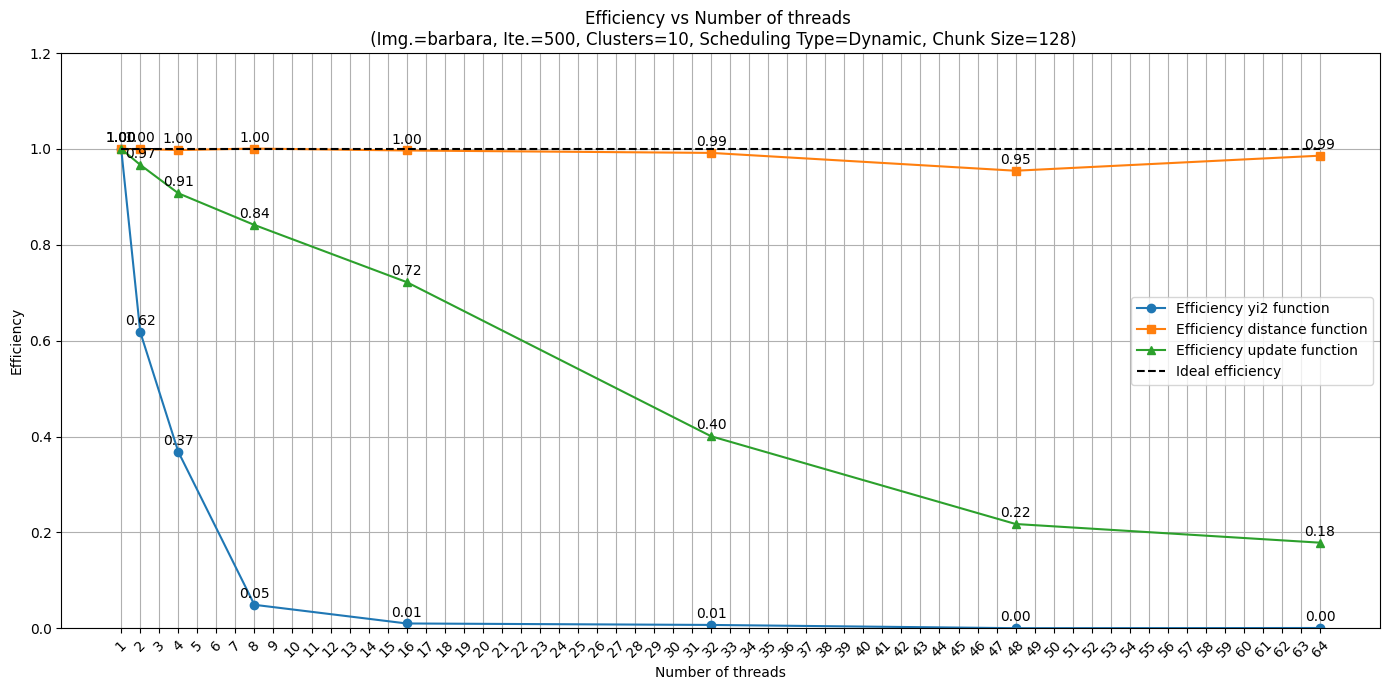

In [17]:
fixed_image = 'Barbara'
fixed_scheduling_type = 1
fixed_chunk_size = 128

filtered_df = summary_df[(summary_df['Scheduling type'] == fixed_scheduling_type) & (summary_df['Chunk size'] == fixed_chunk_size) & (summary_df['Image'] == fixed_image)]

filtered_df = filtered_df.sort_values('Number of threads')
max_threads = filtered_df['Number of threads'].max()

plt.figure(figsize=(14, 7))

plt.plot(filtered_df['Number of threads'], filtered_df['Efficiency yi2'], marker='o', label='Efficiency yi2 function')
plt.plot(filtered_df['Number of threads'], filtered_df['Efficiency distance'], marker='s', label='Efficiency distance function')
plt.plot(filtered_df['Number of threads'], filtered_df['Efficiency update'], marker='^', label='Efficiency update function')
plt.plot([1, max_threads], [1, 1], 'k--', label='Ideal efficiency')

plt.title(f'Efficiency vs Number of threads \n (Img.={fixed_image.lower()}, Ite.=500, Clusters=10, Scheduling Type={scheduling_types[fixed_scheduling_type]}, Chunk Size={fixed_chunk_size})')
plt.xlabel('Number of threads')
plt.ylabel('Efficiency')

plt.xticks(range(1, max_threads + 1), rotation=45)
plt.yticks()
plt.ylim(0, 1.2)

plt.grid()

plt.legend()

for i, row in filtered_df.iterrows():

	plt.annotate(f"{row['Efficiency yi2']:.2f}", (row['Number of threads'], row['Efficiency yi2']), textcoords="offset points", xytext=(0,5), ha='center')
	plt.annotate(f"{row['Efficiency distance']:.2f}", (row['Number of threads'], row['Efficiency distance']), textcoords="offset points", xytext=(0,5), ha='center')
	plt.annotate(f"{row['Efficiency update']:.2f}", (row['Number of threads'], row['Efficiency update']), textcoords="offset points", xytext=(0,5), ha='center')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, f'efficiency_vs_threads.{fixed_image.lower()}.png'))

plt.show()


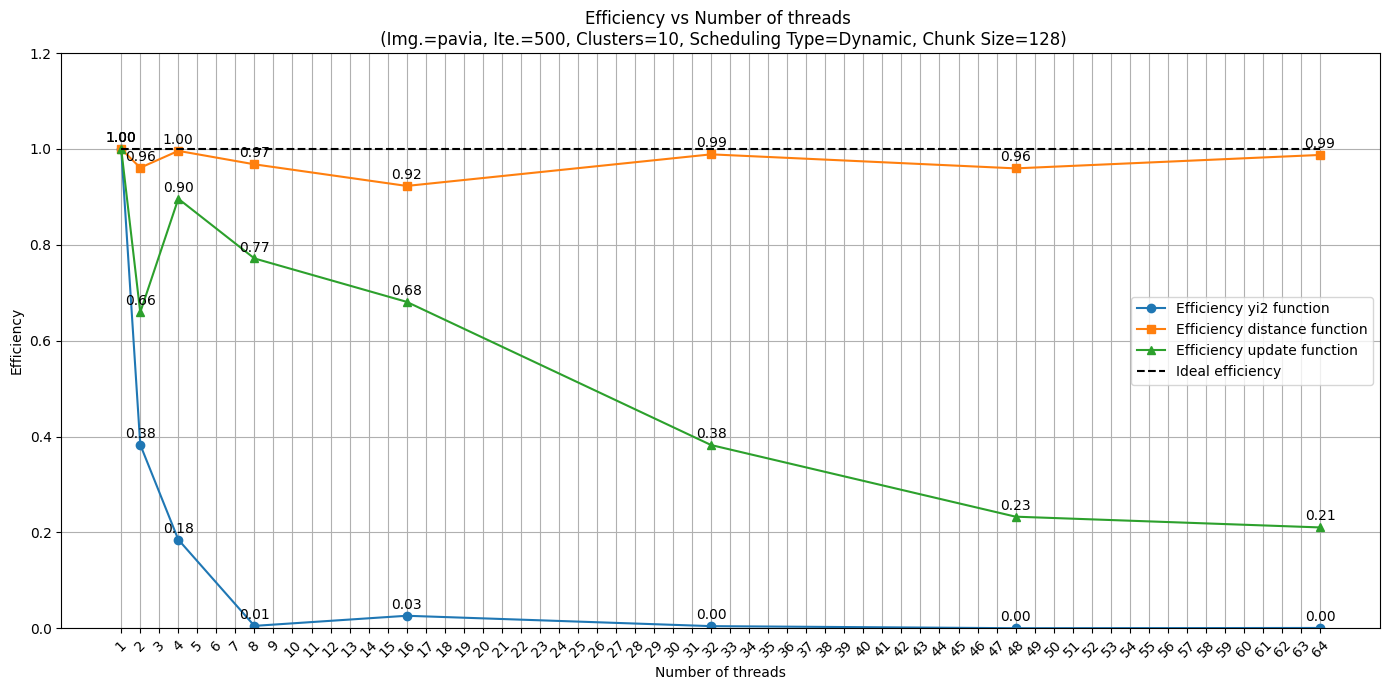

In [18]:
fixed_image = 'Pavia'
fixed_scheduling_type = 1
fixed_chunk_size = 128

filtered_df = summary_df[(summary_df['Scheduling type'] == fixed_scheduling_type) & (summary_df['Chunk size'] == fixed_chunk_size) & (summary_df['Image'] == fixed_image)]

filtered_df = filtered_df.sort_values('Number of threads')
max_threads = filtered_df['Number of threads'].max()

plt.figure(figsize=(14, 7))

plt.plot(filtered_df['Number of threads'], filtered_df['Efficiency yi2'], marker='o', label='Efficiency yi2 function')
plt.plot(filtered_df['Number of threads'], filtered_df['Efficiency distance'], marker='s', label='Efficiency distance function')
plt.plot(filtered_df['Number of threads'], filtered_df['Efficiency update'], marker='^', label='Efficiency update function')
plt.plot([1, max_threads], [1, 1], 'k--', label='Ideal efficiency')

plt.title(f'Efficiency vs Number of threads \n (Img.={fixed_image.lower()}, Ite.=500, Clusters=10, Scheduling Type={scheduling_types[fixed_scheduling_type]}, Chunk Size={fixed_chunk_size})')
plt.xlabel('Number of threads')
plt.ylabel('Efficiency')

plt.xticks(range(1, max_threads + 1), rotation=45)
plt.yticks()
plt.ylim(0, 1.2)

plt.grid()

plt.legend()

for i, row in filtered_df.iterrows():

	plt.annotate(f"{row['Efficiency yi2']:.2f}", (row['Number of threads'], row['Efficiency yi2']), textcoords="offset points", xytext=(0,5), ha='center')
	plt.annotate(f"{row['Efficiency distance']:.2f}", (row['Number of threads'], row['Efficiency distance']), textcoords="offset points", xytext=(0,5), ha='center')
	plt.annotate(f"{row['Efficiency update']:.2f}", (row['Number of threads'], row['Efficiency update']), textcoords="offset points", xytext=(0,5), ha='center')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, f'efficiency_vs_threads.{fixed_image.lower()}.png'))

plt.show()
